# GOAL 1: Data Loading and Exploration

In [1]:
#Import necessary libraries
import pandas as pd
#loading the dataset
data = pd.read_csv("Live.csv")

In [2]:
# Display basic statistics and information about the dataset
print(data.describe())
print(data.info())

       num_reactions  num_comments   num_shares    num_likes    num_loves  \
count    7050.000000   7050.000000  7050.000000  7050.000000  7050.000000   
mean      230.117163    224.356028    40.022553   215.043121    12.728652   
std       462.625309    889.636820   131.599965   449.472357    39.972930   
min         0.000000      0.000000     0.000000     0.000000     0.000000   
25%        17.000000      0.000000     0.000000    17.000000     0.000000   
50%        59.500000      4.000000     0.000000    58.000000     0.000000   
75%       219.000000     23.000000     4.000000   184.750000     3.000000   
max      4710.000000  20990.000000  3424.000000  4710.000000   657.000000   

          num_wows    num_hahas     num_sads   num_angrys  Column1  Column2  \
count  7050.000000  7050.000000  7050.000000  7050.000000      0.0      0.0   
mean      1.289362     0.696454     0.243688     0.113191      NaN      NaN   
std       8.719650     3.957183     1.597156     0.726812      NaN   

In [3]:
# Check for missing values
print(data.isnull().sum())

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64


In [4]:
# Explore unique values in categorical columns
print(data['status_type'].value_counts())

status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64


In [38]:
pip install matplotlib pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


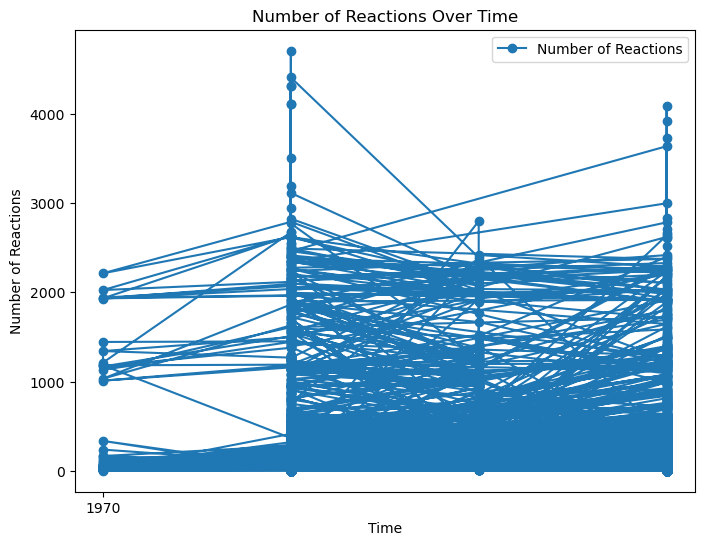

In [51]:
import matplotlib.pyplot as plt

# Convert 'status_published' column to datetime
data['status_type'] = pd.to_datetime(data['status_type'])

# Plot 1: Line plot of the number of reactions over time
plt.figure(figsize=(8, 6))
plt.plot(data['status_type'], data['num_reactions'], label='Number of Reactions', marker='o')
plt.title('Number of Reactions Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Reactions')
plt.legend()
plt.show()

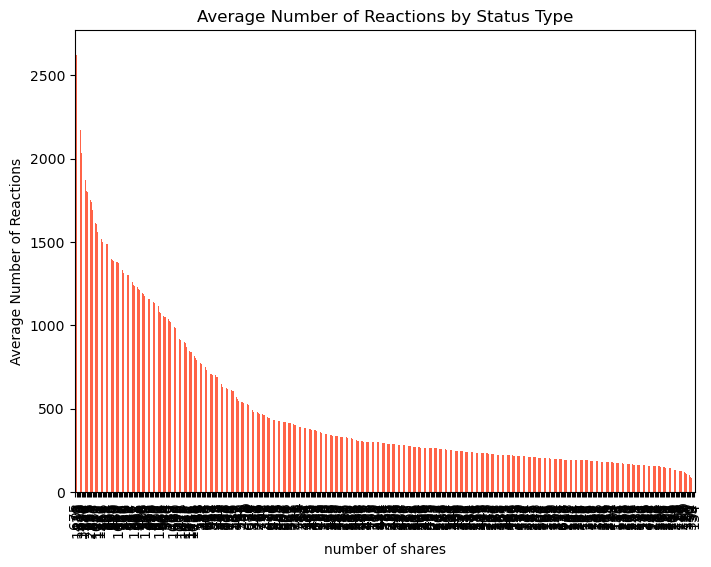

In [54]:
# Plot 2: Bar plot of the average number of reactions by status type
average_reactions_by_type = data.groupby('num_shares')['num_reactions'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
average_reactions_by_type.plot(kind='bar', color='tomato')
plt.title('Average Number of Reactions by Status Type')
plt.xlabel('number of shares')
plt.ylabel('Average Number of Reactions')
plt.show()

# GOAL 2: Clustering

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select relevant columns for clustering
features = data[['num_reactions', 'num_comments', 'num_shares']]

In [6]:
# Normalize the data
normalized_features = (features - features.mean()) / features.std()
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster_label'] = kmeans.fit_predict(normalized_features)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


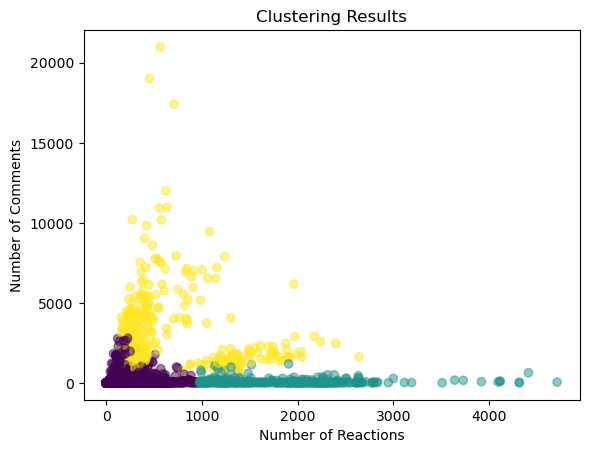

In [7]:
# Plot cluster membership
plt.scatter(data['num_reactions'], data['num_comments'], c=data['cluster_label'], cmap='viridis', alpha=0.5)
plt.title('Clustering Results')
plt.xlabel('Number of Reactions')
plt.ylabel('Number of Comments')
plt.show()

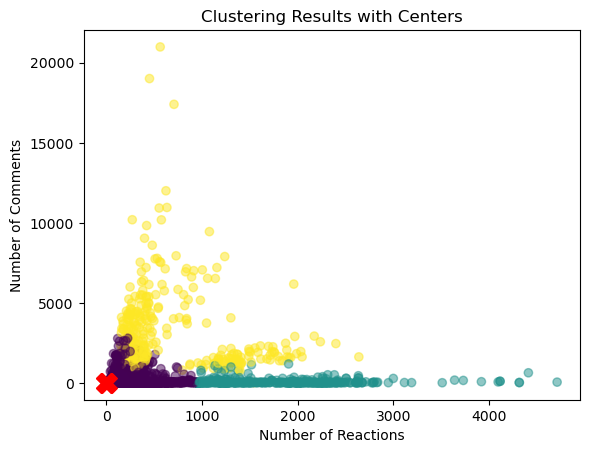

In [8]:
# Plot cluster centers
plt.scatter(data['num_reactions'], data['num_comments'], c=data['cluster_label'], cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200)
plt.title('Clustering Results with Centers')
plt.xlabel('Number of Reactions')
plt.ylabel('Number of Comments')
plt.show()

In [9]:
data.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
 12  cluster_label     7050 non-null   int32 
dtypes: int32(1), int64(9), object(3)
memory usage: 688.6+ KB


In [11]:
data.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster_label
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,0.143404
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,0.457596
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,2.000000


In [12]:
# view the labels in the variable

data['status_id'].unique()

array(['246675545449582_1649696485147474',
       '246675545449582_1649426988507757',
       '246675545449582_1648730588577397', ...,
       '1050855161656896_1060126464063099',
       '1050855161656896_1058663487542730',
       '1050855161656896_1050858841656528'], dtype=object)

In [13]:
# view how many different types of variables are there

len(data['status_id'].unique())

6997

In [14]:
# view the labels in the variable

data['status_published'].unique()

array(['4/22/2018 6:00', '4/21/2018 22:45', '4/21/2018 6:17', ...,
       '9/21/2016 23:03', '9/20/2016 0:43', '9/10/2016 10:30'],
      dtype=object)

In [15]:
# view how many different types of variables are there

len(data['status_published'].unique())

6913

In [16]:
# view the labels in the variable

data['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [17]:
# view how many different types of variables are there

len(data['status_type'].unique())

4

# GOAL 3: Data Preprocessing for Model Fitting

In [18]:
data.drop(['status_id', 'status_published'], axis=1, inplace=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
 10  cluster_label  7050 non-null   int32 
dtypes: int32(1), int64(9), object(1)
memory usage: 578.4+ KB


In [20]:
data.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster_label
0,video,529,512,262,432,92,3,1,1,0,0
1,photo,150,0,0,150,0,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0,0
3,photo,111,0,0,111,0,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0,0


### Declare feature vector and target variable

In [21]:
X = data

y = data['status_type']

### Convert categorical variable into integers 

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['status_type'] = le.fit_transform(X['status_type'])

y = le.transform(y)

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    7050 non-null   int32
 1   num_reactions  7050 non-null   int64
 2   num_comments   7050 non-null   int64
 3   num_shares     7050 non-null   int64
 4   num_likes      7050 non-null   int64
 5   num_loves      7050 non-null   int64
 6   num_wows       7050 non-null   int64
 7   num_hahas      7050 non-null   int64
 8   num_sads       7050 non-null   int64
 9   num_angrys     7050 non-null   int64
 10  cluster_label  7050 non-null   int32
dtypes: int32(2), int64(9)
memory usage: 550.9 KB


In [24]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster_label
0,3,529,512,262,432,92,3,1,1,0,0
1,1,150,0,0,150,0,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0,0
3,1,111,0,0,111,0,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0,0


### Feature Scaling 

In [25]:
cols = X.columns

In [26]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [27]:
X = pd.DataFrame(X, columns=[cols])

In [28]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster_label
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,0.0


# GOAL 4: K-Means Clustering for Classification

### K-Means model with two clusters

In [29]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=0)

### K-Means model parameters study

In [30]:
kmeans.cluster_centers_

array([[9.89220564e-01, 6.85536402e-02, 2.97508408e-02, 3.27579877e-02,
        6.02164338e-02, 5.24552529e-02, 8.89735972e-03, 1.07028552e-02,
        7.89353884e-03, 7.94415022e-03, 1.59618574e-01],
       [3.49432227e-01, 3.86139516e-02, 7.75415961e-04, 7.31777414e-04,
        3.80849055e-02, 2.16988507e-03, 2.42289997e-03, 1.17692944e-03,
        3.15805494e-03, 1.41885407e-03, 2.59810263e-02]])

In [31]:
kmeans.inertia_

580.8231173566945

### Check quality of weak classification by the model 

In [32]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 4288 out of 7050 samples were correctly labeled.


In [33]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.61


### Use elbow method to find optimal number of clusters 

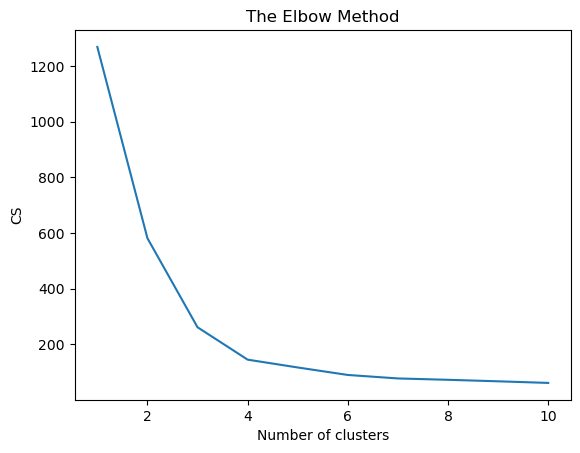

In [34]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

### K-means model results with two clusters

In [35]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,random_state=0)

kmeans.fit(X)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Result: 4288 out of 7050 samples were correctly labeled.
Accuracy score: 0.61


### K-Means model results with 3 clusters

In [36]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Result: 136 out of 7050 samples were correctly labeled.
Accuracy score: 0.02


### K-Means model results with 4 clusters

In [37]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Result: 1960 out of 7050 samples were correctly labeled.
Accuracy score: 0.28
